In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single datase
combined_df = pd.merge(city_df, ride_df, on="city", how="left")
combined_df = combined_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [12]:
groupByCity = combined_df.groupby('city')

city = groupByCity['city'].nunique()
fare_avg = groupByCity['fare'].mean()
total_rides = groupByCity['ride_id'].count()
total_drivers = groupByCity['driver_count'].max()
city_type = groupByCity['type'].max()
per_city = total_rides / city

byCity_df = pd.DataFrame ({'Average Fare': fare_avg,
                           'Total Rides': total_rides,
                           'Total Drivers': total_drivers,
                           'City Type': city_type,
                           'Per City': per_city})

byCity_df.head(10)

,Average Fare,Total Rides,Total Drivers,City Type,Per City
city,,,,,
Amandaburgh,24.641667,18,12,Urban,18.0
Barajasview,25.332273,22,26,Urban,22.0
Barronchester,36.422500,16,11,Suburban,16.0
Bethanyland,32.956111,18,22,Suburban,18.0
Bradshawfurt,40.064000,10,7,Rural,10.0
Brandonfort,35.437368,19,10,Suburban,19.0
Carriemouth,28.314444,27,52,Urban,27.0
Christopherfurt,24.501852,27,41,Urban,27.0
Colemanland,30.894545,22,23,Suburban,22.0


## Bubble Plot of Ride Sharing Data

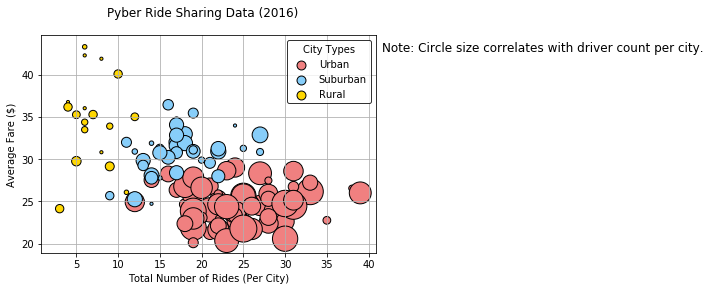

In [33]:
# Obtain the x and y coordinates for each of the three city types
#setting types
urban = byCity_df.loc[byCity_df["City Type"] == "Urban", :]
suburban = byCity_df.loc[byCity_df["City Type"] == "Suburban", :]
rural = byCity_df.loc[byCity_df["City Type"] == "Rural", :]

# Build the scatter plots for each city types

plt.scatter(urban["Per City"], urban["Average Fare"], s=urban["Total Drivers"] * 10, color="lightcoral", edgecolor="black", label="Urban")
plt.scatter(suburban["Per City"], suburban["Average Fare"], s=suburban["Total Drivers"] * 10, color="lightskyblue", edgecolor="black", label="Suburban")
plt.scatter(rural["Per City"], rural["Average Fare"], s=rural["Total Drivers"] * 10, color="gold", edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(frameon=True, edgecolor='black', title="City Types")
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

# Incorporate a text label regarding circle size
plt.title("Note: Circle size correlates with driver count per city.", x=1.5, y=0.9)

# Save Figure
plt.savefig('figures/avgFareVS.png')

In [32]:
# Show plot
plt.show()

## Total Fares by City Type

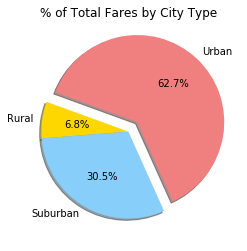

In [36]:
# Calculate Type Percents
groupByType = combined_df.groupby("type")
fare_sum = groupByType["fare"].sum()
fare_percentage = (fare_sum / (fare_sum["Urban"] + fare_sum["Suburban"] + fare_sum["Rural"])) * 100

# Build Pie Chart
## shared parameters
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(fare_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('figures/percentFaresbyType.png')

In [25]:
# Show Figure
plt.show()

## Total Rides by City Type

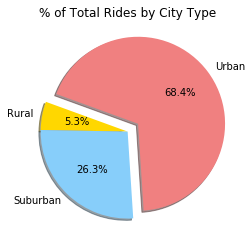

In [38]:
# Calculate Ride Percents
ride_sum = groupByType["ride_id"].count()
ride_percentage = (ride_sum / (ride_sum["Urban"] + ride_sum["Suburban"] + ride_sum["Rural"])) * 100

# Build Pie Chart
plt.pie(ride_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('figures/percentRidesbyType.png')

In [27]:
# Show Figure
plt.show()

## Total Drivers by City Type

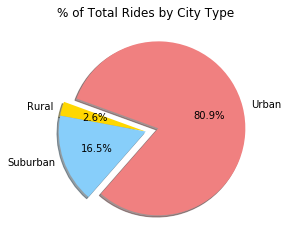

In [41]:
# Calculate Driver Percents
groupByType_city = city_df.groupby(["type"])
total_drivers = groupByType_city['driver_count'].sum()
drivers_percentage = (total_drivers / (total_drivers["Urban"] + total_drivers["Suburban"] + total_drivers["Rural"])) * 100

# Build Pie Charts
plt.pie(drivers_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('figures/percentDriversbyType.png')

In [20]:
# Show Figure
plt.show()